In [1]:
import pandas as pd
data = pd.read_csv('../# - Data/user_ratings.csv')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [3]:
data.shape

(100836, 6)

In [4]:
data['title'].nunique()

9719

<AxesSubplot:>

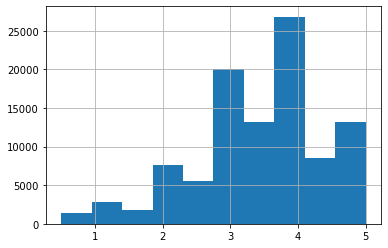

In [5]:
data['rating'].hist()

In [6]:
count = data['title'].value_counts()
_ = list(count[count > 200].index)
_

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)",
 'Fight Club (1999)',
 'Toy Story (1995)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'American Beauty (1999)',
 'Usual Suspects, The (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Apollo 13 (1995)']

In [7]:
_2 = data[data['title'].isin(_)]
_2

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
26933,606,589,3.5,1171325855,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26934,607,589,4.0,963078960,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26935,608,589,3.0,1117415154,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26936,609,589,3.0,847220990,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [8]:
_3 = round(_2[['title','rating']].groupby('title').mean(),2)
_3.sort_values('rating',ascending=False,inplace=True)
_3

,rating
title,
"Shawshank Redemption, The (1994)",4.43
Fight Club (1999),4.27
"Usual Suspects, The (1995)",4.24
Star Wars: Episode IV - A New Hope (1977),4.23
Star Wars: Episode V - The Empire Strikes Back (1980),4.22
Schindler's List (1993),4.22
Pulp Fiction (1994),4.20
"Matrix, The (1999)",4.19
"Silence of the Lambs, The (1991)",4.16


In [9]:
data['userId'].nunique()

610

In [10]:
data[data['userId']==1]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
16056,1,3744,4.0,964980694,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,964981855,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,964981220,What About Bob? (1991),Comedy
16243,1,4006,4.0,964982903,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


In [11]:
from itertools import permutations

In [12]:
?permutations

In [13]:
def MoviePairs(x):
    pairs = pd.DataFrame(list(permutations(x.values,2)),
                        columns=['movie_a','movie_b'])
    return pairs

In [14]:
movie_combinations = data.groupby('userId')['title'].apply(MoviePairs)

In [15]:
movie_combinations

movie_a                           movie_b
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]